<span style="font-family:Times; font-size:2em;">
Importing Libraries:

pandas: DataFrame, basic stats

matplotlib: plotting

numpy: Arrays and math functions

sklearn: Machine Learning, data preparation
</span>

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import  RandomForestClassifier
from sklearn.datasets import make_classification


<span style="font-family:Times; font-size:2em;">
Reading data output from maindriver_newton.C.
Removes the header.
Converts all columns from string to the correct datatype.
Creates the Label column.
Splits data into a train sample and a test sample.
Drops constituents below subleading particle for robustness.
</span>

In [2]:
dat = pd.read_csv("pbgOut.csv", names=['p_T', 'Eta', 'Phi', 'p_T-corr', 'N-Trk', 'Angularity', 'Mean-p_T',
       'p_T_1', 'p_T_2', 'p_T_3', 'p_T_4', 'p_T_5', 'X_tru'])
#dat.columns = list(map(lambda x:x.strip(), dat.columns))
dat = dat[dat.p_T!='p_T']
#dat = dat.apply(lambda x:x.apply(lambda y:y.strip()))

dat = dat.astype({'p_T': np.float64, 'Eta': np.float64, 'Phi': np.float64, 'p_T-corr': np.float64, 'N-Trk': np.int64, 'Angularity': np.float64, 'Mean-p_T': np.float64,'p_T_1': np.float64, 'p_T_2': np.float64, 'p_T_3': np.float64, 'p_T_4': np.float64, 'p_T_5': np.float64, 'X_tru': np.float64})
dat['Label'] = pd.cut(dat['X_tru'], bins = [-0.1, 0.1, 0.2, 0.3, 0.4, 0.5, 1.1], labels = ['Fake', '10% True', '20% True', '30% True', '40% True', '50% True'])
print(dat.describe())
print(dat.columns, dat.dtypes)
train, test = train_test_split(dat, test_size=0.2, random_state=42)
train.drop(['p_T_3', 'p_T_4', 'p_T_5'], 1, inplace=True)
#pd.plotting.scatter_matrix(train)


p_T          Eta          Phi     p_T-corr        N-Trk  \
count  7056.000000  7056.000000  7056.000000  7056.000000  7056.000000   
mean     55.513637    -0.001485     3.152402   -45.838793   371.754110   
std      26.890972     0.281770     1.807224    27.783161   176.992023   
min      10.008100    -0.499996     0.000368  -108.328000    37.000000   
25%      31.700800    -0.241918     1.565492   -69.796075   218.000000   
50%      56.426200     0.000171     3.167885   -44.791050   380.000000   
75%      79.042375     0.234019     4.724950   -22.109975   515.000000   
max      99.987900     0.499969     6.283020    17.593800   726.000000   

        Angularity     Mean-p_T        p_T_1        p_T_2        p_T_3  \
count  7056.000000  7056.000000  7056.000000  7056.000000  7056.000000   
mean      0.335627     0.525632     2.442491     1.954189     1.720776   
std       0.468132     0.059990     0.833243     0.480851     0.419559   
min       0.067312     0.326708     0.789287     0.7

<span style="font-family:Papyrus; font-size:2em;">
Adds a column to train, "X_tru_sum", that represents the total momentum from pythia in the FastJet jet. Plots a histogram of this variable.
</span>

0.13217576187101346


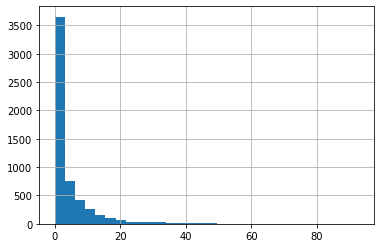

In [3]:
train.describe()
train["X_tru_sum"] = train['X_tru']*train['N-Trk']
train['X_tru_sum'].hist(bins=30)
print(len(train.loc[train['X_tru_sum']>10])/len(train))


<span style="font-family:Papyrus; font-size:2em;">
Making Dataframes X, Y that will become the inputs to the machine learning. We drop "N-Trk", "X_tru", "X_tru_sum", "Label" for robustness in the case of "N-Trk" and to hide the labels from our algorithm. X is the feature set and Y is the Label set. We also bin X_tru_sum before making Y so that we can use classification.
</span>

In [4]:
X = train.drop(['N-Trk', 'X_tru', 'X_tru_sum', 'Label'], 1)
train['Label'] = pd.cut(train['X_tru_sum'], bins=[-1, 10, 1000000], labels=[0, 1])
Y=train['Label']

<span style="font-family:Papyrus; font-size:2em;">
Plotting the "Mean-p_T for the Fake and 10% True jets."
</span>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f99079e84a8>]],
      dtype=object)

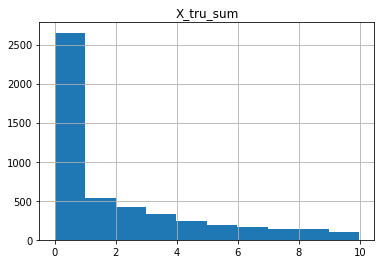

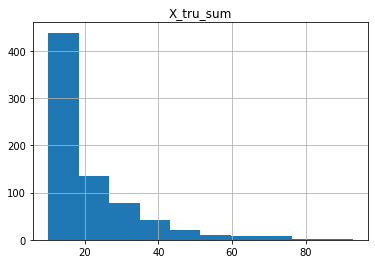

In [57]:

train.loc[train['Label']==0].hist("X_tru_sum" , label="Fake")
train.loc[train['Label']==1].hist("X_tru_sum" , label="10% True")


#clf = tree.DecisionTreeClassifier()
#clf.fit(X, Y)


<span style="font-family:Papyrus; font-size:2em;">
Plotting the correlations between variables. I-Spy: Look for variables that are not that correlated with other variables.
</span>

Index(['p_T', 'Eta', 'Phi', 'p_T-corr', 'N-Trk', 'Angularity', 'Mean-p_T',
       'p_T_1', 'p_T_2', 'X_tru', 'X_tru_sum'],
      dtype='object')


(-0.5, 10.5)

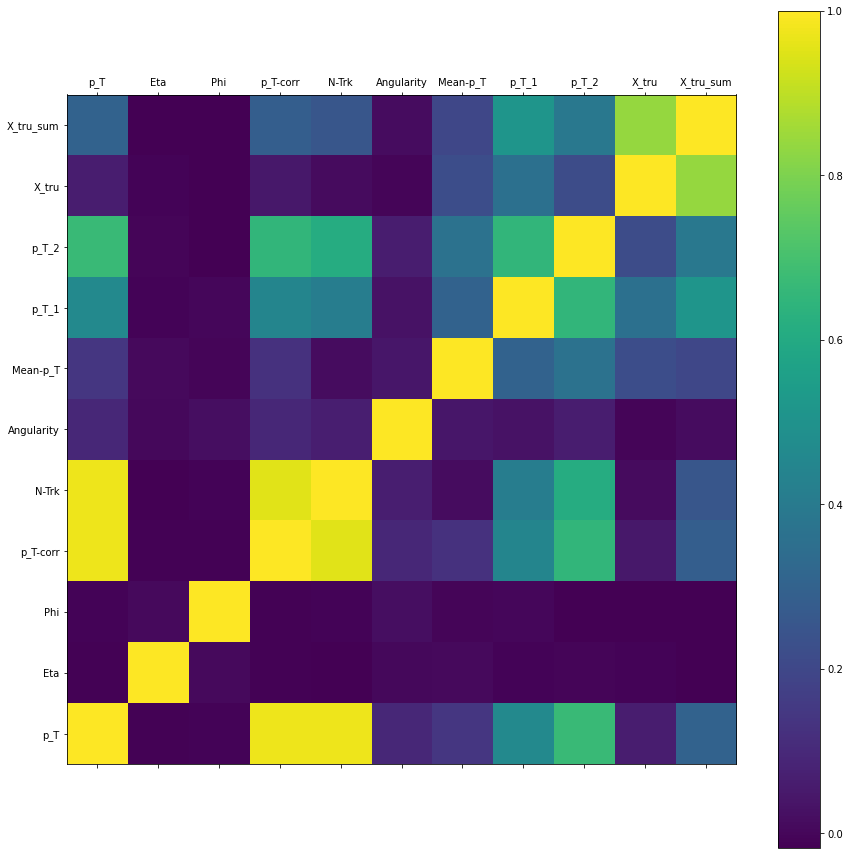

In [67]:
fig = plt.figure(figsize=(15,15))
plt.matshow(train.corr(), fignum=1)
plt.colorbar()
cols = train.columns
plt.xticks(np.linspace(0, len(train.columns)-2, len(train.columns)-1), cols.drop('Label'))
plt.yticks(np.linspace(0, len(train.columns)-2, len(train.columns)-1), cols.drop('Label'))
plt.ylim(-0.5, 10.5)
plt.xlim(-0.5, 10.5)


Create a Decision Tree Classifier [See here](https://medium.com/@chiragsehra42/decision-trees-explained-easily-28f23241248 ). It then fits the features, X, to the labels, Y.


In [68]:
clf = DecisionTreeClassifier()
clf.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Now, let's print the feature importance for the simple Decision Tree. I-Spy: We want to look for features that we might expect to be important and those that surprise us. We also want to be wary of variables like Eta and Phi that should have no importance whatsoever according to the physics. High feature importances for these variables indicate an overfitting problem: it's learning the quirks of Pythia moreso than it generalizes to basic physics. We will see that this serves as a good comparison to the Random Forest Classifier since that is a forest of decision trees. A random forest will be less susceptible to overfitting.

In [69]:
print(X.columns)
clf.feature_importances_
i=0
for col in X.columns:
    print("%s: %f"%(col, clf.feature_importances_[i]))
    i+=1

Index(['p_T', 'Eta', 'Phi', 'p_T-corr', 'Angularity', 'Mean-p_T', 'p_T_1',
       'p_T_2'],
      dtype='object')
p_T: 0.102183
Eta: 0.110076
Phi: 0.098598
p_T-corr: 0.100923
Angularity: 0.129184
Mean-p_T: 0.131723
p_T_1: 0.223796
p_T_2: 0.103517


Now we make the Random Forest Classifier and we specify some hyperparameters(parameters that arre not learned during the fitting process). The max_depth controls how specific we can get with our questions. Think the 20 questions effect: with 20 questions you can guess anything. By limiting the depth we intentionally ignore less important information in favor of the most efficient feature decisions. The criterion ["entropy'|'gini'] determines the optimization factor. I would like to implement a custom metric that accounts for efficiency of true jets. random_state is just a seed.

In [79]:
clf = RandomForestClassifier(max_depth=3, criterion='entropy', random_state=42)
clf.fit(X, Y)
params = {'criterion':('entropy', 'gini','entropy', 'gini'), 'max_depth':(2, 2, 3,3), 'n_estimators':(10,10, 10,10), 'n_jobs':(4,4,4,4)}
gcv = GridSearchCV(clf, params)
gcv.fit(X,Y)

Feature importances for the random forest. We see that when we have more perspectives(100 decision trees) we squash unimportant variables like Eta, Phi, and p_T-corr.

In [80]:
print(X.columns)
clf.feature_importances_
i=0
for col in X.columns:
    print(col, clf.feature_importances_[i])
    i+=1

Index(['p_T', 'Eta', 'Phi', 'p_T-corr', 'Angularity', 'Mean-p_T', 'p_T_1',
       'p_T_2'],
      dtype='object')
p_T 0.18278828691881244
Eta 0.0
Phi 0.00986864150583867
p_T-corr 0.08188617104781562
Angularity 0.11112353786449684
Mean-p_T 0.11654779715551414
p_T_1 0.31811893741495434
p_T_2 0.179666628092568


Here we plot the decision tree structure of one of the trees. It shows us the cuts made and the impurity/entropy/efficiency.

{'bootstrap': True, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


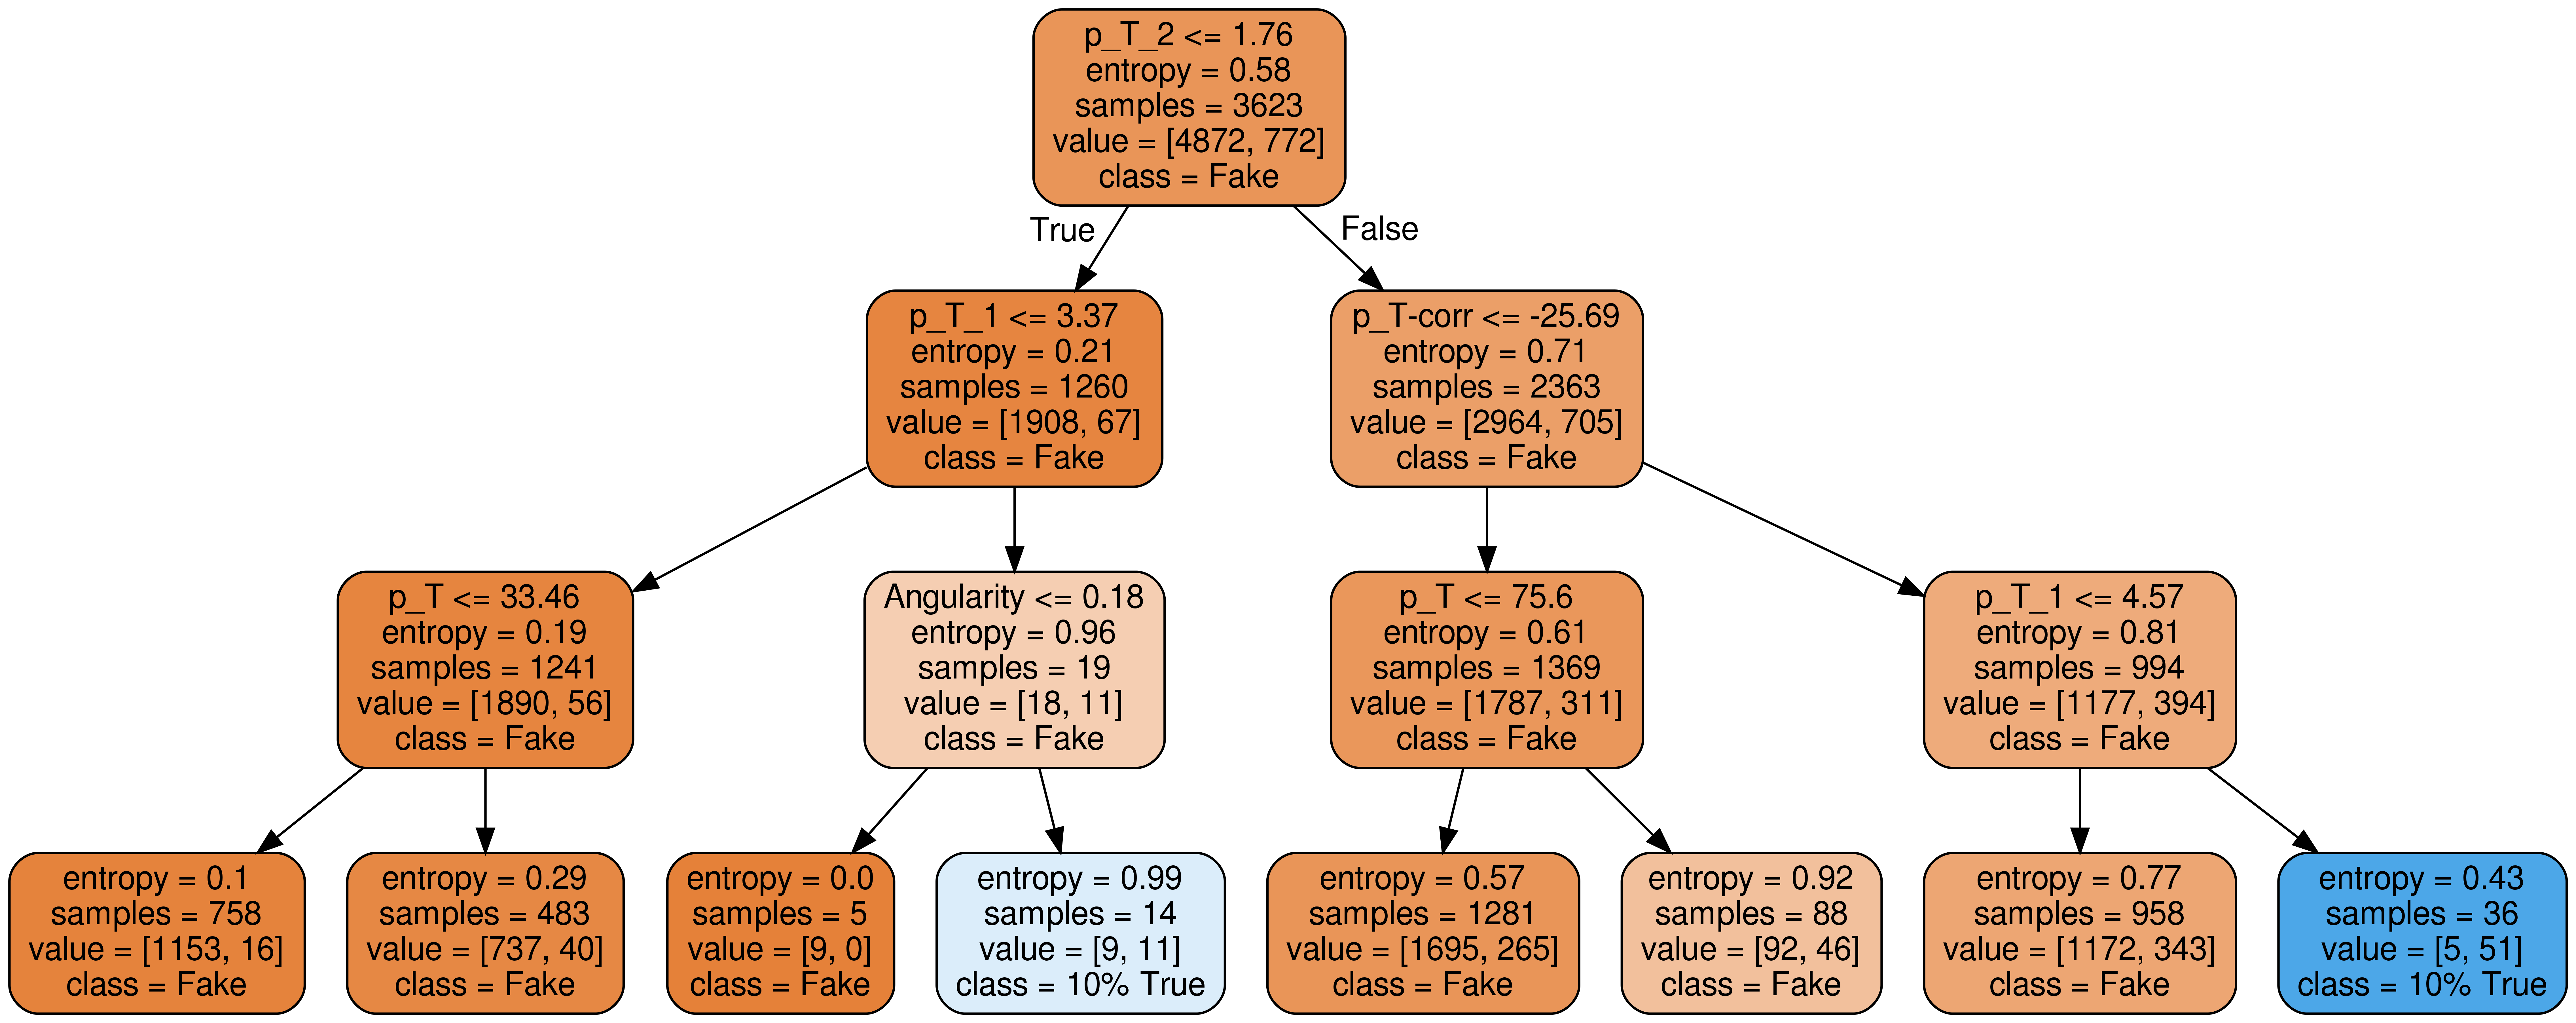

In [72]:

print(clf.get_params())
# Extract single tree
estimator = clf.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns,
                class_names = dat['Label'].unique(),
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')


In [15]:
plot_step = 0.02  # fine step width for decision surface contours

cmap = plt.cm.RdYlBu


pmin = [X[col].min() - 1 for col in X.columns]
pmin = min(pmin)
pmax = [X[col].max() + 1 for col in X.columns]
pmax = max(pmax)

f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11 = np.meshgrid(np.arange(pmin, pmax,plot_step), np.arange(pmin, pmax,plot_step), np.arange(pmin, pmax,plot_step), np.arange(pmin, pmax,plot_step), np.arange(pmin, pmax,plot_step), np.arange(pmin, pmax,plot_step), np.arange(pmin, pmax,plot_step), np.arange(pmin, pmax,plot_step), np.arange(pmin, pmax,plot_step), np.arange(pmin, pmax,plot_step), np.arange(pmin, pmax,plot_step), sparse=True)



x_min, x_max = X['p_T_2'].min() - 1, X['p_T_2'].max() + 1
y_min, y_max = X['Mean-p_T'].min() - 1, X['Mean-p_T'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
print(f2.shape)
print(xx.shape)
print((pmax-pmin)/plot_step)

# Plot either a single DecisionTreeClassifier or alpha blend the
# decision surfaces of the ensemble of classifiers
if isinstance(clf, DecisionTreeClassifier):
    Z = clf.predict(np.c_[f1.ravel(), f2.ravel(), f3.ravel(), f4.ravel(), f5.ravel(), f6.ravel(), f7.ravel(), f8.ravel(), f9.ravel(), f10.ravel(), f11.ravel()])
    Z = Z.reshape((12728,))
    cs = plt.contourf(np.arange(pmin, pmax, plot_step), np.arange(pmin, pmax, plot_step), Z, cmap=cmap)
else:
    # Choose alpha blend level with respect to the number
    # of estimators
    # that are in use (noting that AdaBoost can use fewer estimators
    # than its maximum if it achieves a good enough fit early on)
    estimator_alpha = 1.0 
    for clf_ in clf.estimators_:
        Z = clf_.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

(10516, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)
(131, 346)
10515.795


ValueError: Number of features of the model must match the input. Model n_features is 8 and input n_features is 2 